In [1]:
import tensorflow as tf

In [2]:
(X_train_all, y_train_all) , (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_all.shape, y_train_all.shape

((60000, 28, 28), (60000,))

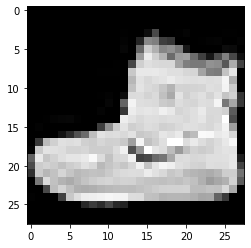

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train_all[0], cmap = 'gray')
plt.show()

In [5]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [6]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [7]:
print(class_names[y_train_all[0]])

Ankel boot


In [9]:
import numpy as np
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

In [12]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [13]:
np.bincount(y_val)

array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200])

In [14]:
X_train = X_train/ 255
X_val = X_val /255

In [15]:
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)

In [16]:
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

## 타깃을 one-hot 인코딩으로 바꾸기

In [17]:
tf.keras.utils.to_categorical([0,1,3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [18]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [19]:
y_train_encoded.shape, y_val_encoded.shape

((48000, 10), (12000, 10))

In [20]:
y_train[0], y_train_encoded[0]

(6, array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32))

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

In [24]:
model.add(Dense(100, activation = 'sigmoid', input_shape= (784, )))
model.add(Dense(10, activation = 'softmax'))

In [25]:
model.compile(optimizer='sgd', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train_encoded, epochs = 40, 
                    validation_data= (X_val, y_val_encoded))

Epoch 1/40
1500/1500 [==============================] - 7s 4ms/step - loss: 1.3854 - accuracy: 0.6377 - val_loss: 0.9716 - val_accuracy: 0.7223
Epoch 2/40
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8481 - accuracy: 0.7410 - val_loss: 0.7532 - val_accuracy: 0.7608
Epoch 3/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7140 - accuracy: 0.7641 - val_loss: 0.6643 - val_accuracy: 0.7788
Epoch 4/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6473 - accuracy: 0.7811 - val_loss: 0.6123 - val_accuracy: 0.7908
Epoch 5/40
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6042 - accuracy: 0.7942 - val_loss: 0.5762 - val_accuracy: 0.8037
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5734 - accuracy: 0.8039 - val_loss: 0.5483 - val_accuracy: 0.8121
Epoch 7/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5502 - accuracy: 0.8116 - val_loss: 0.5288 - val_accuracy:

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


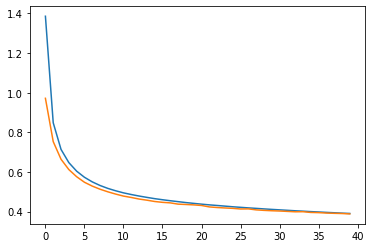

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

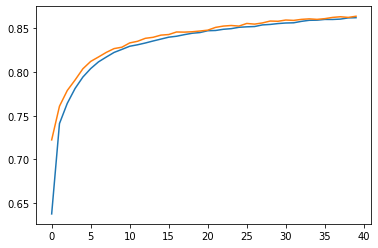

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])